Test for Robocup Report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename1 = 'log_irdist.txt'

# Read the data, skipping the first 9 lines and assuming space-separated values
data = pd.read_csv(filename1, skiprows=9, sep=' ', header=None, usecols=[0, 1, 2])


# Show the first few rows of the dataframe to check it
print(data.head())

              0      1    2
0  1.712226e+09  1.500  1.5
1  1.712226e+09  1.306  1.5
2  1.712226e+09  1.295  1.5
3  1.712226e+09  1.500  1.5
4  1.712226e+09  1.500  1.5


In [3]:
data.columns = ['Time', 'Front_Sensor', 'Side_Sensor']
print(data.head())

           Time  Front_Sensor  Side_Sensor
0  1.712226e+09         1.500          1.5
1  1.712226e+09         1.306          1.5
2  1.712226e+09         1.295          1.5
3  1.712226e+09         1.500          1.5
4  1.712226e+09         1.500          1.5


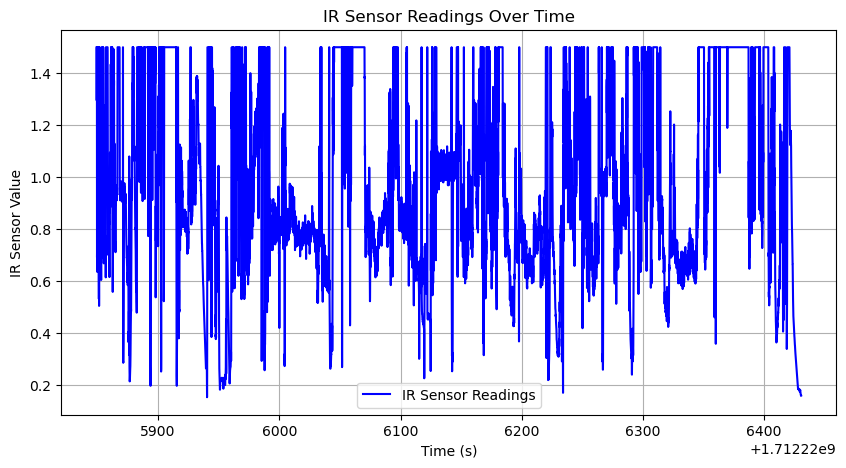

In [4]:
# Plotting the data
plt.figure(figsize=(10, 5))  # Creates a new figure with a specified size
plt.plot(data['Time'], data['Front_Sensor'], label='IR Sensor Readings', color='b', linestyle='-')  # Line plot
plt.title('IR Sensor Readings Over Time')  # Title of the plot
plt.xlabel('Time (s)')  # Label for the x-axis
plt.ylabel('IR Sensor Value')  # Label for the y-axis
plt.grid(True)  # Adds a grid for easier reading
plt.legend()  # Adds a legend to specify what the line represents

# Display the plot
plt.show()

In [5]:
# Replace 'filename.txt' with the path to your data file
filename2 = 'log_mixer.txt'

# Read the data, skipping the first 9 lines and assuming space-separated values
dataMixer = pd.read_csv(filename2, skiprows=12, sep=' ', header=None, usecols=[0, 2])


# Show the first few rows of the dataframe to check it
print(dataMixer.head())

              0     2
0  1.712226e+09  0.00
1  1.712226e+09  0.00
2  1.712226e+09  0.25
3  1.712226e+09  0.25
4  1.712226e+09  0.25


In [6]:
dataMixer.columns = ['Time', 'Linear_Velocity']
print(dataMixer.head())

           Time  Linear_Velocity
0  1.712226e+09             0.00
1  1.712226e+09             0.00
2  1.712226e+09             0.25
3  1.712226e+09             0.25
4  1.712226e+09             0.25


In [7]:
file_path = 'log_plan_axe.txt'

# Read the file with a specified encoding to handle non-UTF-8 characters
dataPlan = pd.read_csv(file_path, delimiter=' ', header=None, skiprows=3,
                   usecols=[0, 1], names=['Time', 'MissionState'],
                   comment='%', encoding='ISO-8859-1')



# Display the first few rows to verify correct reading
print(dataPlan)

            Time  MissionState
0   1.712226e+09            13
1   1.712226e+09            13
2   1.712226e+09            13
3   1.712226e+09            20
4   1.712226e+09            20
5   1.712226e+09            30
6   1.712226e+09            30
7   1.712226e+09            40
8   1.712226e+09            41
9   1.712226e+09            45
10  1.712226e+09            55
11  1.712226e+09            56
12  1.712226e+09             7
13  1.712226e+09             8
14  1.712226e+09             9
15  1.712226e+09            47


In [8]:
# Set time as index
data.set_index('Time', inplace=True)
dataMixer.set_index('Time', inplace=True)
dataPlan.set_index('Time', inplace=True)

print(data.head())
print(dataMixer.head())
print(dataPlan.head())

              Front_Sensor  Side_Sensor
Time                                   
1.712226e+09         1.500          1.5
1.712226e+09         1.306          1.5
1.712226e+09         1.295          1.5
1.712226e+09         1.500          1.5
1.712226e+09         1.500          1.5
              Linear_Velocity
Time                         
1.712226e+09             0.00
1.712226e+09             0.00
1.712226e+09             0.25
1.712226e+09             0.25
1.712226e+09             0.25
              MissionState
Time                      
1.712226e+09            13
1.712226e+09            13
1.712226e+09            13
1.712226e+09            20
1.712226e+09            20


In [9]:
data.sort_values('Time', inplace=True)
dataMixer.sort_values('Time', inplace=True)
dataPlan.sort_values('Time', inplace=True)


# Merge based on nearest time
combined_data = pd.merge_asof(data, dataMixer, on='Time')

In [10]:
# Merge based on nearest time
combined_data = pd.merge_asof(combined_data, dataPlan, on='Time')

In [11]:
combined_data.head()

,Time,Front_Sensor,Side_Sensor,Linear_Velocity,MissionState
0,1.712226e+09,1.500,1.5,0.00,NaN
1,1.712226e+09,1.306,1.5,0.25,NaN
2,1.712226e+09,1.295,1.5,0.25,NaN
3,1.712226e+09,1.500,1.5,0.25,NaN
4,1.712226e+09,1.500,1.5,0.25,NaN


In [12]:
# Check the first few entries to understand the structure
print("Before adjustment:")
print(combined_data['Time'].head())

# Subtract the minimum time value from the 'Time' column to reset start to 0
combined_data['Time'] = combined_data['Time'] - combined_data['Time'].min()

# Check the results after adjustment
print("After adjustment:")
print(combined_data['Time'].head())

Before adjustment:
0    1.712226e+09
1    1.712226e+09
2    1.712226e+09
3    1.712226e+09
4    1.712226e+09
Name: Time, dtype: float64
After adjustment:
0    0.0000
1    0.0449
2    0.0895
3    0.1339
4    0.1794
Name: Time, dtype: float64


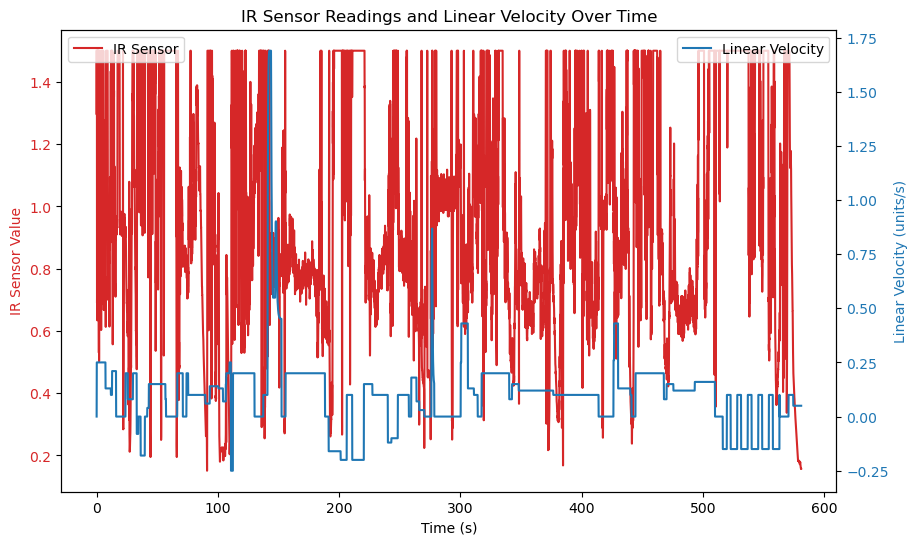

In [13]:
# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot IR sensor data on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('IR Sensor Value', color=color)
ax1.plot(combined_data['Time'], combined_data['Front_Sensor'], color=color, label='IR Sensor')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the linear velocity
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Linear Velocity (units/s)', color=color)  # we already handled the x-label with ax1
ax2.plot(combined_data['Time'], combined_data['Linear_Velocity'], color=color, label='Linear Velocity')
ax2.tick_params(axis='y', labelcolor=color)

# Optional: Add a legend or more customization
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title
plt.title('IR Sensor Readings and Linear Velocity Over Time')

# Show the plot
plt.show()

In [14]:
combined_data['MissionState'] = combined_data['MissionState'].fillna(0)
print(combined_data.head())

     Time  Front_Sensor  Side_Sensor  Linear_Velocity  MissionState
0  0.0000         1.500          1.5             0.00           0.0
1  0.0449         1.306          1.5             0.25           0.0
2  0.0895         1.295          1.5             0.25           0.0
3  0.1339         1.500          1.5             0.25           0.0
4  0.1794         1.500          1.5             0.25           0.0


In [15]:
combined_data['StateChange'] = (combined_data['MissionState'] != combined_data['MissionState'].shift(1))

In [16]:
# To only log changes, you might want to create a filtered DataFrame where changes occur
state_changes = combined_data[combined_data['StateChange']]

# Display the filtered DataFrame with state changes
print(combined_data.head())

     Time  Front_Sensor  Side_Sensor  Linear_Velocity  MissionState  \
0  0.0000         1.500          1.5             0.00           0.0   
1  0.0449         1.306          1.5             0.25           0.0   
2  0.0895         1.295          1.5             0.25           0.0   
3  0.1339         1.500          1.5             0.25           0.0   
4  0.1794         1.500          1.5             0.25           0.0   

   StateChange  
0         True  
1        False  
2        False  
3        False  
4        False  


In [17]:
print(combined_data.head())

     Time  Front_Sensor  Side_Sensor  Linear_Velocity  MissionState  \
0  0.0000         1.500          1.5             0.00           0.0   
1  0.0449         1.306          1.5             0.25           0.0   
2  0.0895         1.295          1.5             0.25           0.0   
3  0.1339         1.500          1.5             0.25           0.0   
4  0.1794         1.500          1.5             0.25           0.0   

   StateChange  
0         True  
1        False  
2        False  
3        False  
4        False  


In [18]:
# Filter the DataFrame to only include times from 250 to 350 seconds
filtered_data = combined_data[(combined_data['Time'] >= 255) & (combined_data['Time'] <= 300)]

# Check the first few rows of the new DataFrame to ensure it looks correct
print(filtered_data.head())

# Optionally, check the last few rows
print(filtered_data.tail())

          Time  Front_Sensor  Side_Sensor  Linear_Velocity  MissionState  \
5667  255.0173         0.832          1.5              0.1           0.0   
5668  255.0629         0.830          1.5              0.1           0.0   
5669  255.1074         0.882          1.5              0.1           0.0   
5670  255.1522         0.853          1.5              0.1           0.0   
5671  255.1976         0.849          1.5              0.1           0.0   

      StateChange  
5667        False  
5668        False  
5669        False  
5670        False  
5671        False  
          Time  Front_Sensor  Side_Sensor  Linear_Velocity  MissionState  \
6662  299.7944         1.151          1.5              0.0          47.0   
6663  299.8389         1.148          1.5              0.0          47.0   
6664  299.8835         1.127          1.5              0.0          47.0   
6665  299.9287         1.123          1.5              0.0          47.0   
6666  299.9743         1.178          1.5  

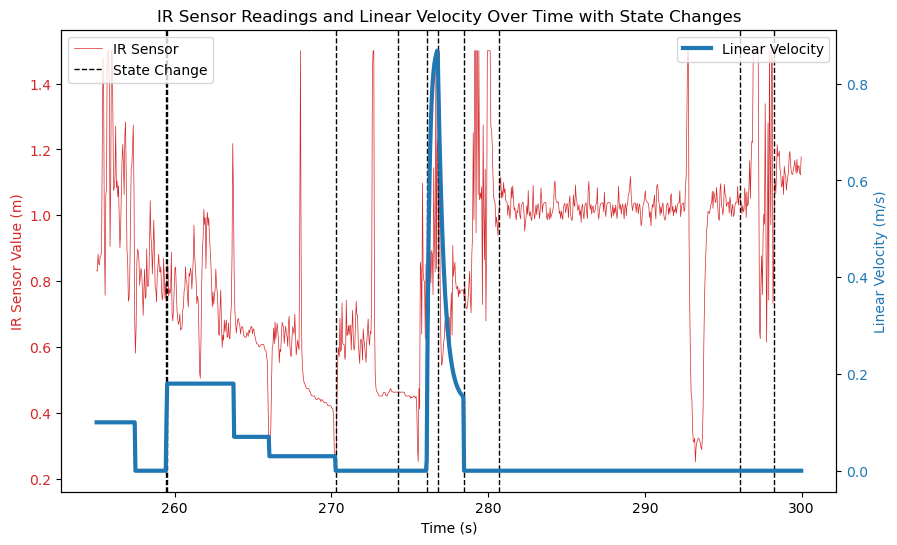

In [19]:
# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot IR sensor data on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('IR Sensor Value (m)', color=color)
ax1.plot(filtered_data['Time'], filtered_data['Front_Sensor'], color=color, label='IR Sensor', linewidth=0.5)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the linear velocity
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Linear Velocity (m/s)', color=color)
ax2.plot(filtered_data['Time'], filtered_data['Linear_Velocity'], color=color, label='Linear Velocity', linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

# Adding vertical lines for state changes
change_times = filtered_data['Time'][filtered_data['StateChange']]
for time in change_times:
    ax1.axvline(x=time, color='black', linestyle='--', linewidth=1, label='State Change' if time == change_times.iloc[0] else "")


# Adding a single entry for state changes in the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title
plt.title('IR Sensor Readings and Linear Velocity Over Time with State Changes')

# Show the plot
plt.show()

In [20]:
print(combined_data.head())

     Time  Front_Sensor  Side_Sensor  Linear_Velocity  MissionState  \
0  0.0000         1.500          1.5             0.00           0.0   
1  0.0449         1.306          1.5             0.25           0.0   
2  0.0895         1.295          1.5             0.25           0.0   
3  0.1339         1.500          1.5             0.25           0.0   
4  0.1794         1.500          1.5             0.25           0.0   

   StateChange  
0         True  
1        False  
2        False  
3        False  
4        False  
